# CHAPTER 5

# Section 1

Learning about how to fit generic mathematical functions in PyTorch, not just for neural networks.


In [1]:
import torch

In [2]:
# trying to calibrate a new thermometer

In [110]:
truth_celsius = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] # celsius
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] # unknown shit

In [111]:
truth_celsius = torch.tensor(truth_celsius)
x = torch.tensor(x)

type(truth_celsius), type(x)

(torch.Tensor, torch.Tensor)

In [5]:
# testing a linear model

# celsius = w * x + b

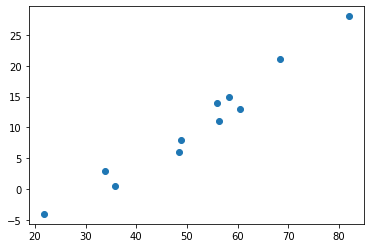

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x, truth_celsius)

In [7]:
# a simple model

def model(data, w, b):
    return data * w + b

In [8]:
# loss function - mean squared difference is used because it is better to have a few slightly
# higher losses than a few really high ones, which mean squared error takes care of

def loss(y, y_pred):
    return torch.mean(torch.pow(y - y_pred, 2))

In [9]:
# initialize params

# we don't need to specify the shape of these params
# because while using multiplication with pytorch tensors, they will be broadcasted
w = torch.ones(())
b = torch.zeros(())

In [10]:
# forward pass

preds = model(x, w, b)
preds

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [11]:
loss_val = loss(preds, truth_celsius)
loss_val

tensor(1763.8846)

The hypothesis (forward pass) function is defined as:

$$
\large h(x) = {w \cdot x + b}
$$

To generalize the hypothesis to arbritrary parameters and inputs in a univariate linear regression, we derive:

$$
\large h_{\theta}(x) = \theta_0 x_0 + \theta_1 x_1
$$

We will assume the following:

$$
\large b = \theta_0 \\
\large w = \theta_1 \\
$$

Since $b$ or $\theta_0$ is a constant/intercept, it will be multiplied with $1$.

$$
\large x_0 = 1
$$

Hence the loss function will be:

$$
\large \hat{L}_{(y, \hat{y})} = \frac{1}{2m} \sum_{i = 1}^{m}\, (\hat{y}^{(i)} - y^{(i)}) ^ 2 \qquad ,y^{(i)} = h_{\theta}(x^{(i)})
$$

Substituting the hypothesis function into the loss function:

$$
\large \hat{L}_{(\theta_0, \theta_1)} = \frac{1}{2m} \sum_{i = 1}^{m}\, (h_{\theta}(x^{(i)}) - y^{(i)}) ^ 2 \qquad ,h_{\theta}(x) = \theta_0 x_0 + \theta_1 x_1
$$

__Note:__ The _2_ in the denominator of the loss function is placed there for convenience so that when the derivative of the loss function is taken, the _2's_ divide out and we are left with $\large\frac{1}{m}$
however this is not implemented in the code because for optimization purposes it is unnecessary.


The $\large\frac{1}{m}$ is in the equation so that the loss function does not depend on the number of examples in the dataset, and its values are comparable across any dataset size.

---

The derivative of the loss function with respect to its parameters according to the Chain rule will be:

$$
\large \frac{\partial}{\partial \theta_{0, 1}}\hat{L}(\theta_0, \theta_1) = 
\frac{\partial \hat{L}(\theta_0, \theta_1)}{\partial h_{\theta}(x)} \times
\frac{\partial h_{\theta}(x)}{\partial \theta_{0, 1}}
$$

The derivative of the loss function with respect to the hypothesis function is as follows:

$$
\large\frac{\partial \hat{L}(\theta_0, \theta_1)}{\partial h_{\theta}(x)} = 
\frac{1}{m} \sum_{i = 1}^{m}\, (h_{\theta}(x^{(i)}) - y^{(i)}) \qquad , h_{\theta}(x) = \theta_0 x_0 + \theta_1 x_1 
$$

---

The derivative of the hypothesis function with respect to $\theta_0$ will be:

$$
\large\begin{equation}
\frac{\partial}{\partial \theta_0} h_{\theta}(x) = \frac{\partial}{\partial \theta_0} (\theta_0 x_0 + \theta_1 x_1) \\
\frac{\partial}{\partial \theta_0} h_{\theta}(x) = \frac{\partial}{\partial \theta_0} (\theta_0 x_0) + \frac{\partial}{\partial \theta_0} (\theta_1 x_1) \\
\frac{\partial}{\partial \theta_0} h_{\theta}(x) = \frac{\partial}{\partial \theta_0} (\theta_0 x_0) + \textit{0} \\
\frac{\partial}{\partial \theta_0} h_{\theta}(x) = x_0 = 1
\end{equation}
$$

The value of $\large\frac{\partial}{\partial \theta_0} h_{\theta}(x)$ will be broadcasted to a vector so that it is compatible to be multiplied with $\large\frac{\partial \hat{L}(\theta_0, \theta_1)}{\partial h_{\theta}(x)}$.

---

The derivative of the hypothesis function with respect to $\large\theta_1$ will be:

$$
\large\begin{equation}
\frac{\partial}{\partial \theta_1} h_{\theta}(x) = \frac{\partial}{\partial \theta_1} (\theta_0 x_0 + \theta_1 x_1) \\
\frac{\partial}{\partial \theta_1} h_{\theta}(x) = \frac{\partial}{\partial \theta_1} (\theta_0 x_0) + \frac{\partial}{\partial \theta_1} (\theta_1 x_1) \\
\frac{\partial}{\partial \theta_1} h_{\theta}(x) = \textit{0} + \frac{\partial}{\partial \theta_1} (\theta_1 x_1) \\
\frac{\partial}{\partial \theta_1} h_{\theta}(x) = x_1 \\
x_1 = \vec{x_1}
\end{equation}
$$

$\large\vec{x_1}$ represents the input vector to the model (the list of temperature values in this case).

---

The gradient of the loss function will therefore be:

$$
\Large\nabla_{\theta_0, \theta_1} \hat{L} = 
\begin{pmatrix}
\frac{\partial \hat{L}}{\partial \theta_0}, \frac{\partial \hat{L}}{\partial \theta_1}
\end{pmatrix}
=
\begin{pmatrix}
\frac{\partial \hat{L}}{\partial h_{\theta}(x)} \frac{\partial h_{\theta}(x)}{\partial \theta_0},
\frac{\partial \hat{L}}{\partial h_{\theta}(x)} \frac{\partial h_{\theta}(x)}{\partial \theta_1}
\end{pmatrix}
$$

In [69]:
def dl_h(preds, truth):
    derivative = 2 * (preds - truth) / preds.size(0)
    return derivative

In [13]:
dh_w = lambda data, w, b: data

In [14]:
dh_b = lambda data, w, b: 1.0 # this will be broadcasted into a vector when multiplied with dl_dh

In [72]:
# a function to get all the gradients together

def grad(data, preds, truth, w, b):
    l = loss(preds, truth)
    
    dl_dh = dl_h(preds, truth) # this is an intermediate derivative. It's not of much use
    
    # these 2 statements result in vectors
    dl_dw = dl_dh * dh_w(data, w, b)
    dl_db = dl_dh * dh_b(data, w, b)
    
    return torch.stack([dl_dw.sum(), dl_db.sum()]) # sum is done to make the vectors into a scalar

### Training

In [119]:
def train_loop(epochs, lr, params, data, truth):
    for epoch in range(1, epochs+1):
        
        w, b = params
        
        curr_pred = model(data, w, b)
        
        curr_loss = loss(curr_pred, truth)
        
        gradient = grad(data, curr_pred, truth, w, b)
        
        params -= lr * gradient
        
        print(f"Epoch {epoch}:\tloss = {torch.round(curr_loss)}\ngrad: dw: {torch.round(gradient[0])} db: {torch.round(gradient[1])}\nparams: w: {params[0]} b: {params[1]}\n")

In [120]:
truth_celsius, x

(tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
          6.0000, 13.0000, 21.0000]),
 tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]))

In [121]:
# WARNING: BRACE FOR FAILURE
train_loop(40, 0.001, torch.tensor([1.0, 0.0]), x, truth_celsius)

Epoch 1:	loss = 1764.0
grad: dw: 4517.0 db: 83.0
params: w: -3.5172972679138184 b: -0.08260000497102737

Epoch 2:	loss = 41400.0
grad: dw: -22060.0 db: -386.0
params: w: 18.542882919311523 b: 0.3029572069644928

Epoch 3:	loss = 986625.0
grad: dw: 107729.0 db: 1901.0
params: w: -89.18596649169922 b: -1.597691535949707

Epoch 4:	loss = 23528174.0
grad: dw: -526086.0 db: -9264.0
params: w: 436.89971923828125 b: 7.666170120239258

Epoch 5:	loss = 561094592.0
grad: dw: 2569098.0 db: 45257.0
params: w: -2132.1982421875 b: -37.590972900390625

Epoch 6:	loss = 13380877312.0
grad: dw: -12545989.0 db: -220992.0
params: w: 10413.791015625 b: 183.40093994140625

Epoch 7:	loss = 319104516096.0
grad: dw: 61267356.0 db: 1079214.0
params: w: -50853.5703125 b: -895.8136596679688

Epoch 8:	loss = 7609945948160.0
grad: dw: -299194336.0 db: -5270242.0
params: w: 248340.78125 b: 4374.4287109375

Epoch 9:	loss = 181480487649280.0
grad: dw: 1461091968.0 db: 25736834.0
params: w: -1212751.25 b: -21362.40625



#### See kids, this is why you don't set the learning rate to be too high. The training blows up.

In [122]:
train_loop(40, 1e-4, torch.tensor([1.0, 0.0]), x, truth_celsius)

Epoch 1:	loss = 1764.0
grad: dw: 4517.0 db: 83.0
params: w: 0.5482703447341919 b: -0.008259999565780163

Epoch 2:	loss = 323.0
grad: dw: 1860.0 db: 36.0
params: w: 0.36231541633605957 b: -0.011838428676128387

Epoch 3:	loss = 79.0
grad: dw: 765.0 db: 17.0
params: w: 0.2857687473297119 b: -0.013489648699760437

Epoch 4:	loss = 38.0
grad: dw: 315.0 db: 9.0
params: w: 0.2542608380317688 b: -0.014347515068948269

Epoch 5:	loss = 31.0
grad: dw: 130.0 db: 5.0
params: w: 0.2412935048341751 b: -0.014878788031637669

Epoch 6:	loss = 29.0
grad: dw: 53.0 db: 4.0
params: w: 0.2359585464000702 b: -0.015275613404810429

Epoch 7:	loss = 29.0
grad: dw: 22.0 db: 3.0
params: w: 0.23376551270484924 b: -0.015617088414728642

Epoch 8:	loss = 29.0
grad: dw: 9.0 db: 3.0
params: w: 0.23286586999893188 b: -0.015935774892568588

Epoch 9:	loss = 29.0
grad: dw: 4.0 db: 3.0
params: w: 0.2324986606836319 b: -0.016245078295469284

Epoch 10:	loss = 29.0
grad: dw: 1.0 db: 3.0
params: w: 0.23235063254833221 b: -0.01655

#### Now kids, this is what we call converging.

#### Let's try input normalization for the input vector so that the gradients (w and b) are not different from each other. This will allow the learning rate to meaningfully update both parameters.

In [123]:
x_n = 0.1 * x
x_n, truth_celsius

(tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
         6.0400, 6.8400]),
 tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
          6.0000, 13.0000, 21.0000]))

In [124]:
train_loop(100, 1e-4, torch.tensor([1.0, 0.0]), x_n, truth_celsius)

Epoch 1:	loss = 80.0
grad: dw: -78.0 db: -11.0
params: w: 1.0077613592147827 b: 0.0010639999527484179

Epoch 2:	loss = 80.0
grad: dw: -77.0 db: -11.0
params: w: 1.0154759883880615 b: 0.0021197462920099497

Epoch 3:	loss = 79.0
grad: dw: -77.0 db: -10.0
params: w: 1.0231441259384155 b: 0.003167289076372981

Epoch 4:	loss = 79.0
grad: dw: -76.0 db: -10.0
params: w: 1.0307661294937134 b: 0.004206678364425898

Epoch 5:	loss = 78.0
grad: dw: -76.0 db: -10.0
params: w: 1.0383422374725342 b: 0.005237963050603867

Epoch 6:	loss = 77.0
grad: dw: -75.0 db: -10.0
params: w: 1.045872688293457 b: 0.006261192727833986

Epoch 7:	loss = 77.0
grad: dw: -75.0 db: -10.0
params: w: 1.0533578395843506 b: 0.007276416290551424

Epoch 8:	loss = 76.0
grad: dw: -74.0 db: -10.0
params: w: 1.060797929763794 b: 0.00828368216753006

Epoch 9:	loss = 76.0
grad: dw: -74.0 db: -10.0
params: w: 1.0681931972503662 b: 0.009283038787543774

Epoch 10:	loss = 75.0
grad: dw: -74.0 db: -10.0
params: w: 1.0755438804626465 b: 0.